In [2]:
import pandas as pd
data=pd.read_csv("C:/Users/amris/MUJ/Projects/cust_churn/Churn_Modelling.csv")

In [3]:
print(data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [17]:
from pycaret.classification import *
s = setup(data, target='Exited', ignore_features=['CustomerID', 'Surname', 'RowNumber'])

,Description,Value
0,Session id,194
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(10000, 14)"
4,Transformed data shape,"(10000, 14)"
5,Transformed train set shape,"(7000, 14)"
6,Transformed test set shape,"(3000, 14)"
7,Ignore features,3
8,Numeric features,9
9,Categorical features,2


In [18]:
#compare Models
best_model=compare_models(sort='AUC')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:32:11
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8626,0.8626,0.4670,0.7682,0.5804,0.5041,0.5267,0.5670
lightgbm,Light Gradient Boosting Machine,0.8551,0.8503,0.4790,0.7165,0.5736,0.4906,0.5053,0.2290
ada,Ada Boost Classifier,0.8553,0.8450,0.4636,0.7276,0.5658,0.4841,0.5021,0.2560
rf,Random Forest Classifier,0.8609,0.8441,0.4516,0.7708,0.5689,0.4928,0.5181,0.3710
et,Extra Trees Classifier,0.8537,0.8390,0.4187,0.7540,0.5372,0.4589,0.4875,0.2800
xgboost,Extreme Gradient Boosting,0.8489,0.8284,0.4825,0.6837,0.5653,0.4771,0.4880,0.1500
ridge,Ridge Classifier,0.8077,0.7668,0.1290,0.6344,0.2135,0.1563,0.2219,0.0660
lda,Linear Discriminant Analysis,0.8104,0.7668,0.2448,0.5806,0.3436,0.2542,0.2868,0.0630
nb,Naive Bayes,0.7839,0.7340,0.0694,0.3583,0.1156,0.0515,0.0757,0.0550
lr,Logistic Regression,0.7836,0.7311,0.0786,0.3390,0.1250,0.0579,0.0765,0.0780


In [19]:
gbc=create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8700,0.8952,0.4718,0.8072,0.5956,0.5244,0.5512
1,0.8743,0.8868,0.5000,0.8068,0.6174,0.5471,0.5695
2,0.8629,0.8754,0.4225,0.8108,0.5556,0.4838,0.5198
3,0.8643,0.8445,0.4859,0.7582,0.5923,0.5155,0.5339
4,0.8557,0.8405,0.4545,0.7386,0.5628,0.4822,0.5026
5,0.8729,0.8575,0.4965,0.8068,0.6147,0.5437,0.5667
6,0.8543,0.8549,0.4545,0.7303,0.5603,0.4786,0.4980
7,0.8643,0.8590,0.4965,0.7553,0.5992,0.5216,0.5383
8,0.8471,0.8450,0.4266,0.7093,0.5328,0.4481,0.4688


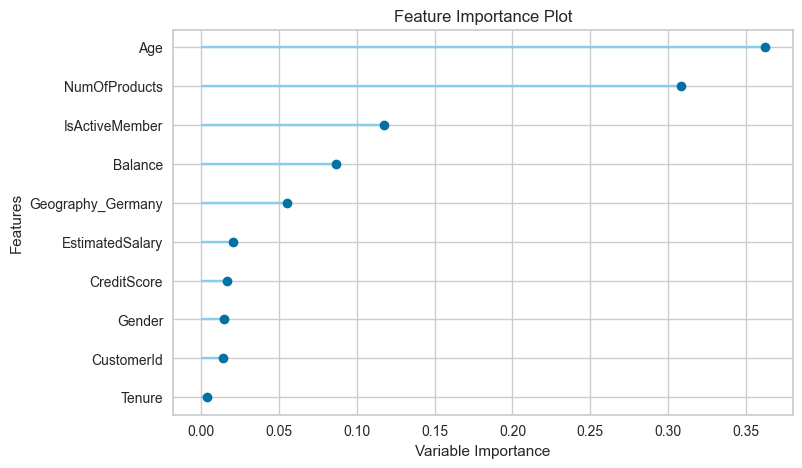

In [20]:
plot_model(gbc, plot='feature')

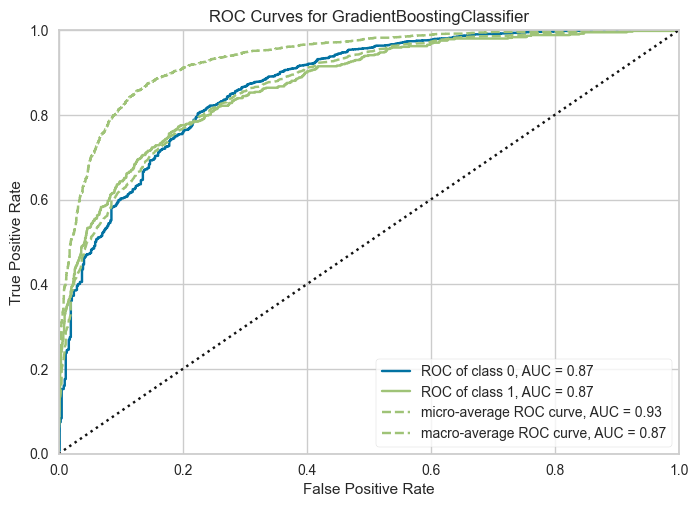

In [21]:
plot_model(gbc, plot='auc')

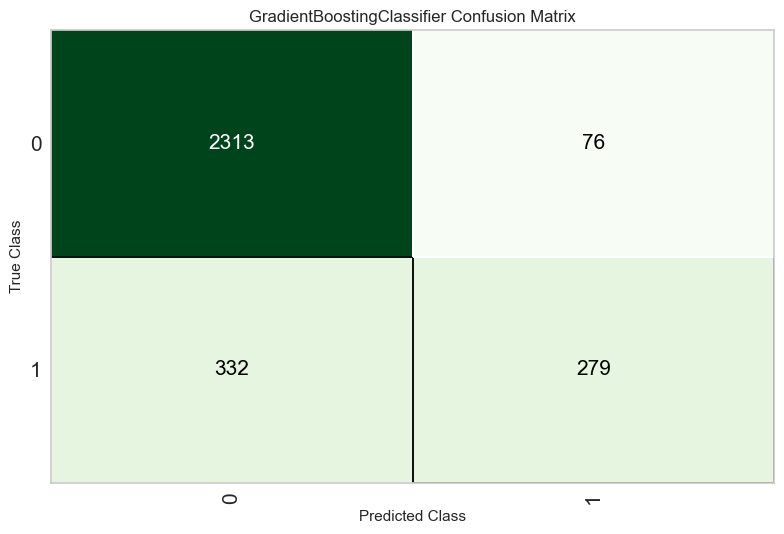

In [22]:
plot_model(gbc, plot='confusion_matrix')

In [24]:
tuned_gbc = tune_model(gbc, n_iter=50) 
evaluate_model(tuned_gbc)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [25]:
final_gbc = finalize_model(tuned_gbc)

In [27]:
predictions = predict_model(final_gbc, data=data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9156,0.9729,0.6078,0.9649,0.7458,0.6983,0.7251


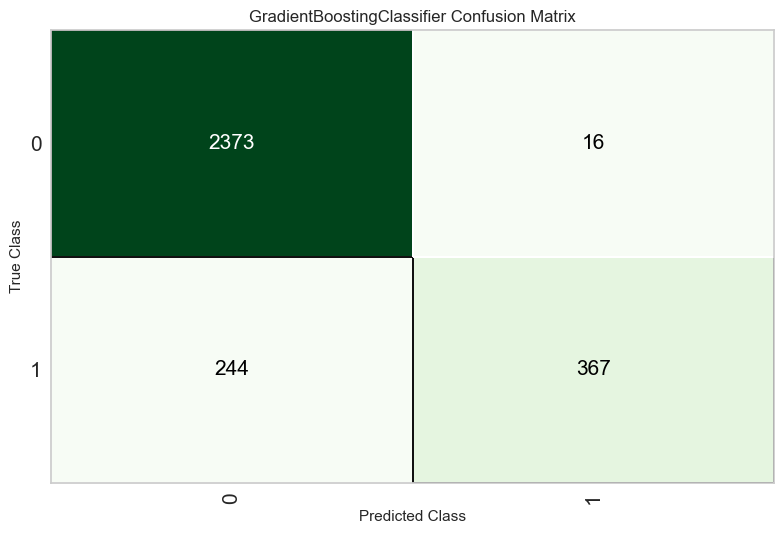

In [28]:
plot_model(final_gbc, plot='confusion_matrix')